0. Let's Define the problem

In [16]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline  

xl = 100*1e3
yl = 100*1e3
nx = 101
ny = 101
dt = 1000 # years
nstep = 1000 

k = 1e-4
n = 1
m = 0.4
u = 2.e-3

### boundary condition 
c1: h = 0 and (U = 0) along all 4 boundaries /
c2: h = 0 at y = 0, y = yl and cyclic boundary conditions between x = 0 and x = xl /
c3: h = 0 at y = 0 and relfective boundary conditions at y = yl and cyclic boundary condition / 

initial condition h = 0, nut need to adding a 1m high random noise

# convection, everything only have one index
nn = nx*ny
h = np.random.rand((nn))

#### Do not run this, 
for j in range(ny): <br />
    for i in range(nx):<br />
        nn2 = i+j*nx

In [17]:
################
#  TEST ARRAY  #
################
xl = 10.
yl = 5.
nx = 10
ny = 5
nn = nx*ny
h = np.array([9,0,0,0,6,6,6,5,4,3,
              2,2,2,2,5,5,5,4,4,2,
              3,3,3,3,5,4,3,2,1,0,
              2,2,2,2,5,5,5,4,4,2,
              0,0,0,0,6,6,6,5,4,3])

# DERIVED VARIABLES
dx = xl/(nx)
dy = yl/(ny) 
indexVector = np.arange(nn)
reshaped_index = indexVector.reshape(ny,nx)

In [18]:
def helper(old,roots):
    if len(roots) == 0: # check if roots is an empty array        
        return old
    else:
        node = roots[0]
        old = old+[node]
        
        if ndon[node] == 0:
            roots = roots[1:]
        else:
            roots = donors[node]+roots[1:]
        return helper(old, roots)

In [19]:
# 1.compare with 8 different number
recdists = [] # distance to the receiver
recInds = [] # which is the receiver 
#dx = xl/(nx-1)
#dy = yl/(ny-1)
ddia = math.sqrt(dx*dx+dy*dy)

for i in range(nn):
    hmin = h[i]
    rec = i # reciver is itself
    d = 0  # distance is zero
    
    # make the hmin at the edges as zero first than calculate the inside value, fixed boundary 
    if i < nx or i > nn-nx or i % nx == 0 or i % nx == nx-1:
        d = 0  
        rec = i
        
    # 4 diagonal, 2 left, 2 right，if the dist is the same go y 
    else:
        ulist = [i-1,i+1,i-nx,i+nx, i-1-nx, i+1-nx, i-1+nx, i+1+nx]
        dd = [dx, dx, dy, dy, ddia,ddia, ddia,ddia]
        for j in range(8):
            u = ulist[j]
            a = h[u]
            
            if a < hmin:
                hmin = a
                d = dd[j]
                rec = u
    
    recdists.append(d) # distancce to its receiver  
    recInds.append(rec) # index of the receiver 

In [20]:
ndon = [0]*nn
donors = [[]]*nn

for i in range(nn):
    current =recInds[i]
    if i !=current:
        donors[current] = donors[current]+[i]
        ndon[current] = ndon[current]+1

In [21]:
#start from the boundary and find its roots until the roots is itself 
#process to the doner until the #nun doner is zero
stacks = []
colors = []
# loop through each local minimum 
for i in range(nn):
    if i == recInds[i]:
        starter = i
        old = []
        stacks = stacks+helper(old, [starter])
        nsameColor = len(helper(old,[starter]))
        colors = colors +[starter]*nsameColor
        

In [34]:
revstacks = stacks[::-1]
#calculate the drange area, since it does not run in order, we need initialize it into numpy format
area = np.ones(nn)*dx*dy
print dx*dy
for node in revstacks:
    if recInds[node] != node: #if it is not at the highest elevation
        area[recInds[node]] = area[recInds[node]]+area[node]

1.0


In [35]:
def plot_mesh(oneD_in):
    """Take 1-d array, plot as color mesh grid"""
    grid = np.reshape(oneD_in,(ny,nx))
    plt.pcolormesh(grid, cmap='RdBu')
    #plt.gca().invert_yaxis()
    #plt.show()

reshaped_h = h.reshape(ny,nx)
receiver =np.asarray(recInds)
ndon = np.asarray(ndon)
stack = np.asarray(stacks)
slope = np.zeros(nn)
direction = np.full(nn, 4)


reshaped_receiver = receiver.reshape(ny,nx)
reshaped_ndon = ndon.reshape(ny,nx)
print 'h'
print reshaped_h
print 'index'
print reshaped_index
print 'receiver'
print reshaped_receiver
print 'ndon'
print reshaped_ndon
print 'area'
print area.reshape(ny,nx)
print 'stack'
print stack.reshape(ny,nx)

h
[[9 0 0 0 6 6 6 5 4 3]
 [2 2 2 2 5 5 5 4 4 2]
 [3 3 3 3 5 4 3 2 1 0]
 [2 2 2 2 5 5 5 4 4 2]
 [0 0 0 0 6 6 6 5 4 3]]
index
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
receiver
[[ 0  1  2  3  4  5  6  7  8  9]
 [10  1  2  3  3 26 27 28 29 19]
 [20 11 12 13 13 26 27 28 29 29]
 [30 41 42 43 43 26 27 28 29 39]
 [40 41 42 43 44 45 46 47 48 49]]
ndon
[[0 1 1 2 0 0 0 0 0 0]
 [0 1 1 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 3 3 3]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 1 2 0 0 0 0 0 0]]
area
[[  1.   3.   3.   5.   1.   1.   1.   1.   1.   1.]
 [  1.   2.   2.   3.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   1.   1.   1.   1.   4.   7.  10.  13.]
 [  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   2.   2.   3.   1.   1.   1.   1.   1.   1.]]
stack
[[ 0  1 11 21  2 12 22  3 13 23]
 [24 14  4  5  6  7  8  9 10 19]
 [20 29 18 28 17 27 16 26 15 25]
 [35 36 37 38 30 39 40 41 31 42]
 [32 

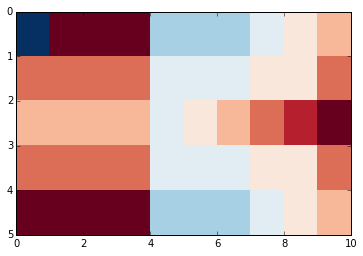

In [24]:

#Build arrow index vector arrays
U = np.zeros(nn)
V = np.zeros(nn)

for ij in indexVector:
    if direction[ij] == 0:
        U[ij] = -1
        V[ij] = 1
    if direction[ij] == 1:
        U[ij] = 0
        V[ij] = 1
    if direction[ij] == 2:
        U[ij] = 1
        V[ij] = 1
    if direction[ij] == 3:
        U[ij] = -1
        V[ij] = 0
    if direction[ij] == 4:
        U[ij] = 0
        V[ij] = 0
    if direction[ij] == 5:
        U[ij] = 1
        V[ij] = 0
    if direction[ij] == 6:
        U[ij] = -1
        V[ij] = -1
    if direction[ij] == 7:
        U[ij] = 0
        V[ij] = -1
    if direction[ij] == 8:
        U[ij] = 1
        V[ij] = -1

plot_mesh(h)



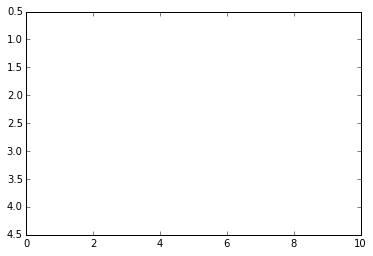

In [31]:
# Plot arrows of steepest descent
qx = np.arange(nx)
qy = np.arange(ny)
qU = U.reshape(ny,nx)
qV = V.reshape(ny,nx)
Q = plt.quiver(qx+(dx/2.0),qy+(dy/2.0),qU,qV)

plt.gca().invert_yaxis()
plt.show()


In [26]:
# loop through the receiver ray 
'''
ndon = np.zeros(nn) # calculate how many donner each cell has
donors = np.empty((nn,8)) # which index is the donner cell
donors[:] = np.NAN
#a = numpy.empty((3,3,))
#>>> a[:] = numpy.NAN
for i in range(nn):
    current = recInds[i] #start from reading the receiver array 
    if i != current:
        num = int(ndon[current])
        donors[current,num]= i # tell the donor where current from 
        ndon[current] = ndon[current]+1 # tell donor how many donor it has
'''

'\nndon = np.zeros(nn) # calculate how many donner each cell has\ndonors = np.empty((nn,8)) # which index is the donner cell\ndonors[:] = np.NAN\n#a = numpy.empty((3,3,))\n#>>> a[:] = numpy.NAN\nfor i in range(nn):\n    current = recInds[i] #start from reading the receiver array \n    if i != current:\n        num = int(ndon[current])\n        donors[current,num]= i # tell the donor where current from \n        ndon[current] = ndon[current]+1 # tell donor how many donor it has\n'

In [27]:
print type(stacks)

<type 'list'>


In [28]:
#build a link list, add the area dxdy 

In [29]:
# first creat a area with 

In [30]:
print a

3
